<a href="https://colab.research.google.com/github/EmeraldSherin/Aies-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("/content/winequality-white.csv",sep=";")
data.shape

(4898, 12)

In [ ]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data.dropna(inplace=True)

data.drop_duplicates(subset=data.columns, ignore_index=True, inplace=True, keep=False)


data.shape



(3189, 12)

In [ ]:
# Splitting the Data
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)

linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)


linear_y_pred = linear_model.predict(X_test)
random_forest_y_pred = random_forest_model.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

rf_mse = mean_squared_error(y_test, random_forest_y_pred)
rf_mae = mean_absolute_error(y_test, random_forest_y_pred)
rf_r2 = r2_score(y_test, random_forest_y_pred)

print("Linear Regression Metrics:")
print("Mean Squared Error:", linear_mse)
print("Mean Absolute Error:", linear_mae)
print("R-squared:", linear_r2)

print("\nRandom Forest Regression Metrics:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R-squared:", rf_r2)



Linear Regression Metrics:
Mean Squared Error: 0.6266125401867986
Mean Absolute Error: 0.6012375719590337
R-squared: 0.2914893489379091

Random Forest Regression Metrics:
Mean Squared Error: 0.5724890282131662
Mean Absolute Error: 0.5661128526645768
R-squared: 0.3526867911320497


In [ ]:
coefficients = linear_model.coef_

feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

print("Top contributing features to wine quality:")
print(feature_coefficients)


Top contributing features to wine quality:
                 Feature  Coefficient
9              sulphates     0.649073
8                     pH     0.600700
10               alcohol     0.229009
3         residual sugar     0.071240
0          fixed acidity     0.045907
5    free sulfur dioxide     0.005119
6   total sulfur dioxide    -0.000242
4              chlorides    -0.026475
2            citric acid    -0.061303
1       volatile acidity    -1.914884
7                density  -124.264125


In [ ]:

best_quality = data['quality'].max()

print("The best quality in the dataset:", best_quality)


The best quality in the dataset: 9


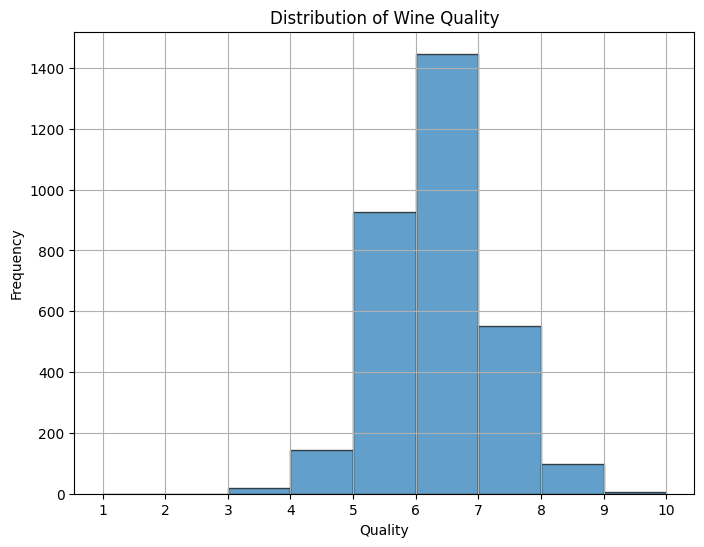

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(data['quality'], bins=range(1, 11), edgecolor='black', alpha=0.7)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
# Calculate the mode of wine quality
mode_quality = data['quality'].mode()[0]
print("The most common quality score (mode) is:", mode_quality)


The most common quality score (mode) is: 6


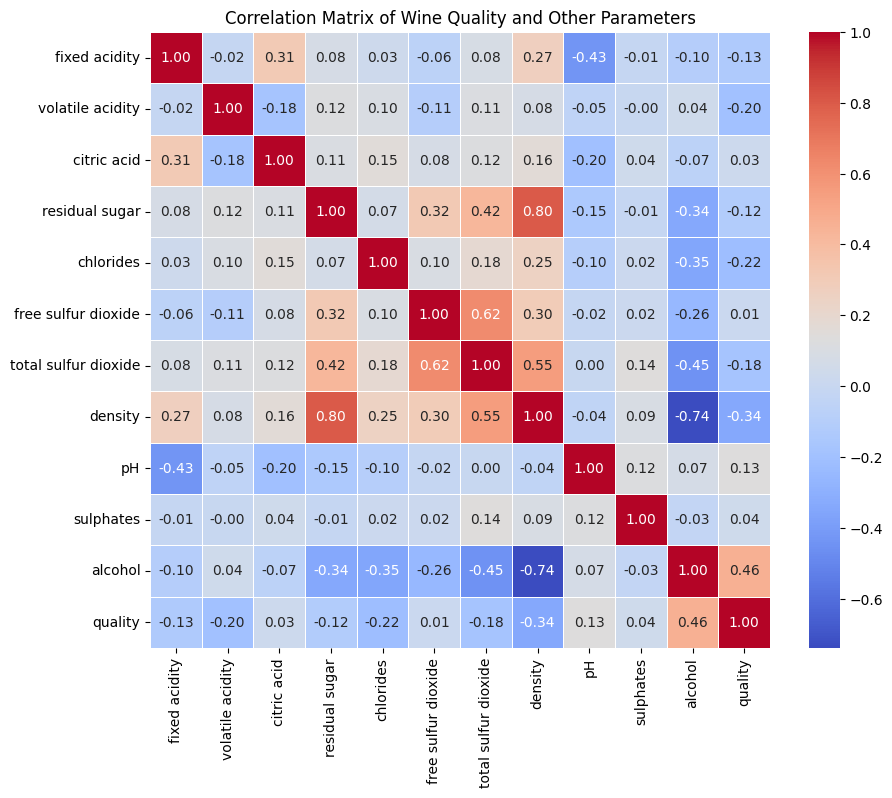

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wine Quality and Other Parameters')
plt.show()


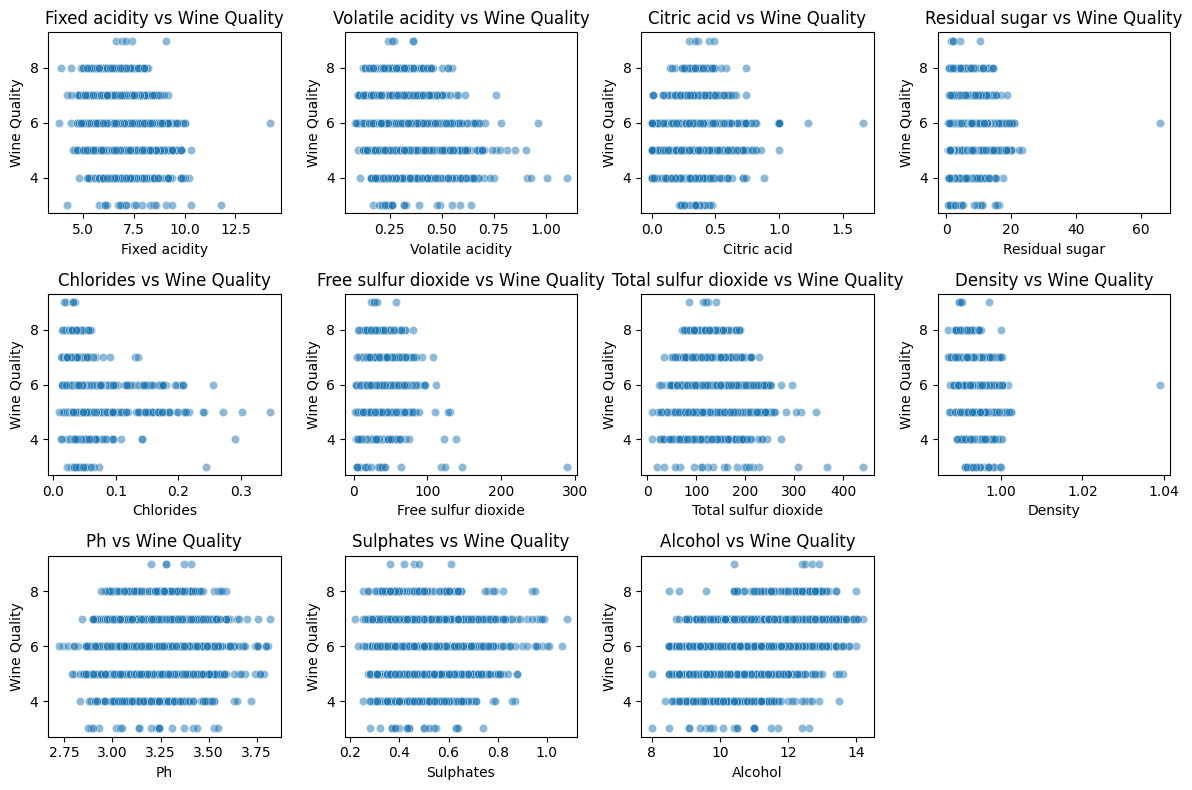

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


parameters = data.columns[:-1]

plt.figure(figsize=(12, 8))
for i, parameter in enumerate(parameters):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=parameter, y='quality', data=data, alpha=0.5)
    plt.title(f'{parameter.capitalize()} vs Wine Quality')
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Wine Quality')

plt.tight_layout()
plt.show()


In [ ]:
# Display the correlation coefficients
correlation_with_quality = data.corr()['quality'].drop('quality')

correlation_with_quality = correlation_with_quality.abs().sort_values(ascending=False)

print("Correlation coefficients between parameters and wine quality:")
print(correlation_with_quality)


Correlation coefficients between parameters and wine quality:
alcohol                 0.461514
density                 0.343549
chlorides               0.217543
volatile acidity        0.197965
total sulfur dioxide    0.178384
pH                      0.131107
fixed acidity           0.128575
residual sugar          0.116044
sulphates               0.040882
citric acid             0.025941
free sulfur dioxide     0.012420
Name: quality, dtype: float64
